# Run Opportunities Created-  A new baseball statistic
***
This is a Sabermetrics final project by Meredith Burgess

In [16]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

NameError: name 'HTML' is not defined

In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
%matplotlib inline

Loading data 

In [23]:
listOfEvents = ["Out", "K", "SB", "DI", "CS", "PK", "WP", "PB", "BK", "OA", "FE", "NIBB", "IBB", "HBP", "XI",
"ROE", "FC", "1B", "2B", "3B", "HR" ]
listOfEventsLong = ["Generic Out", "Strikeout", "Stolen Base", "Defensive Indifference", "Caught Stealing", "Pickoff", "Wild Pitch", "Passed Ball",
"Balk", "Other Advance", "Foul Error", "Nonintentional Walk", "Intentional Walk", "Hit By Pitch", "Interference", "Error", "Fielder Choice",
"Single", "Double", "Triple", "Homerun"]
eventCodes = [2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
eventCodesDict = {"Out":2, "K":3, "SB":4, "DI":5, "CS":6, "PK":8, "WP":9, "PB":10, "BK":11, "OA":12, 
"FE":13, "NIBB":14, "IBB":15, "HBP":16, "XI":17,"ROE":18, "FC":19, "1B":20, "2B":21, "3B":22, "HR":23}

events2DF = pd.read_csv('2gramofevents.csv')
events3DF = pd.read_csv('3gramofevents.csv')
events4DF = pd.read_csv('4gramofevents.csv')

statsDF = pd.read_csv('allStats.csv')

total2 = len(events2DF)
total3 = len(events3DF)
total4 = len(events4DF)
events4DF.head()


,event_cd,eventCD2,eventCD3,eventCD4,runsCt4
0,9,14,2,20,1
1,14,2,20,20,1
2,20,3,2,23,2
3,20,4,2,2,1
4,20,2,14,20,1


-Event frequences in our n-gram 

-Transition matrix between events

-Sequence frequencies 

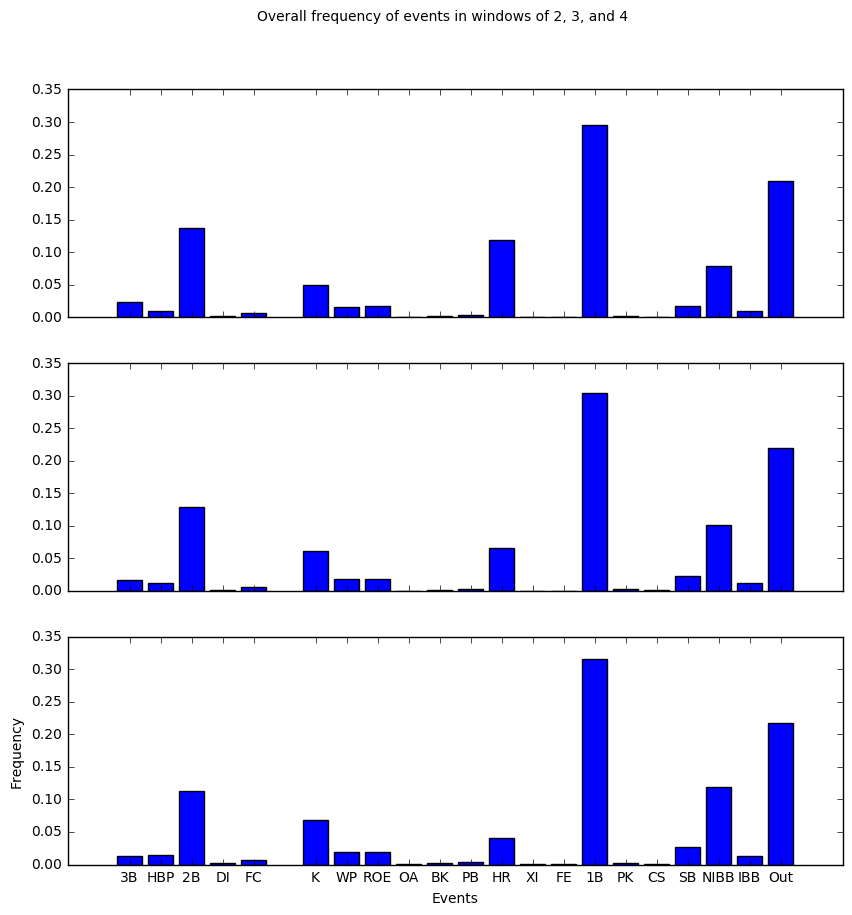

In [61]:
eventFreq2 = {}
eventFreq3 = {}
eventFreq4 = {}

eventFreq2_1 = {}
eventFreq2_2 = {}

eventFreq3_1 = {}
eventFreq3_2 = {}
eventFreq3_3 = {}

eventFreq4_1 = {}
eventFreq4_2 = {}
eventFreq4_3 = {}
eventFreq4_4 = {}

for v in eventCodes:
    eventFreq2[v] = 0
    eventFreq3[v] = 0
    eventFreq4[v] = 0
    
    eventFreq2_1[v] = 0
    eventFreq2_2[v] = 0
    eventFreq3_1[v] = 0
    eventFreq3_2[v] = 0
    eventFreq3_3[v] = 0
    eventFreq4_1[v] = 0
    eventFreq4_2[v] = 0
    eventFreq4_3[v] = 0
    eventFreq4_4[v] = 0

for v in range(0, total2):
    eventFreq2[events2DF['event_cd'][v]] += 1
    eventFreq2[events2DF['eventCD2'][v]] += 1
    
    eventFreq2_1[events2DF['event_cd'][v]] += 1
    eventFreq2_2[events2DF['eventCD2'][v]] += 1
    
for v in range(0, total3):
    eventFreq3[events3DF['event_cd'][v]] += 1
    eventFreq3[events3DF['eventCD2'][v]] += 1
    eventFreq3[events3DF['eventCD3'][v]] += 1
    
    eventFreq3_1[events3DF['event_cd'][v]] += 1
    eventFreq3_2[events3DF['eventCD2'][v]] += 1
    eventFreq3_3[events3DF['eventCD3'][v]] += 1
    
for v in range(0, total4):
    eventFreq4[events4DF['event_cd'][v]] += 1
    eventFreq4[events4DF['eventCD2'][v]] += 1
    eventFreq4[events4DF['eventCD3'][v]] += 1
    eventFreq4[events4DF['eventCD4'][v]] += 1
    
    eventFreq4_1[events4DF['event_cd'][v]] += 1
    eventFreq4_2[events4DF['eventCD2'][v]] += 1
    eventFreq4_3[events4DF['eventCD3'][v]] += 1
    eventFreq4_4[events4DF['eventCD4'][v]] += 1
    
eventNameFreq2 = {}
eventNameFreq3 = {}
eventNameFreq4 = {}

eventNameFreq2_1 = {}
eventNameFreq2_2 = {}

eventNameFreq3_1 = {}
eventNameFreq3_2 = {}
eventNameFreq3_3 = {}

eventNameFreq4_1 = {}
eventNameFreq4_2 = {}
eventNameFreq4_3 = {}
eventNameFreq4_4 = {}

for n in listOfEvents:
    k = eventCodesDict[n]
    eventNameFreq2[n] = float(eventFreq2[k]) / float(total2*2)
    eventNameFreq3[n] = float(eventFreq3[k]) / float(total3*3)
    eventNameFreq4[n] = float(eventFreq4[k]) / float(total4*4)
    
    eventNameFreq2_1[n] = float(eventFreq2_1[k]) / float(total2)
    eventNameFreq2_2[n] = float(eventFreq2_2[k]) / float(total2)

    eventNameFreq3_1[n] = float(eventFreq3_1[k]) / float(total3)
    eventNameFreq3_2[n] = float(eventFreq3_2[k]) / float(total3)
    eventNameFreq3_3[n] = float(eventFreq3_3[k]) / float(total3)

    eventNameFreq4_1[n] = float(eventFreq4_1[k]) / float(total4)
    eventNameFreq4_2[n] = float(eventFreq4_2[k]) / float(total4)
    eventNameFreq4_3[n] = float(eventFreq4_3[k]) / float(total4)
    eventNameFreq4_4[n] = float(eventFreq4_4[k]) / float(total4)
    

    
fig, ax = plt.subplots(3, 1, figsize=(10,10), sharey=True, sharex=True)
ax[0].bar(list(eventFreq2.keys()), list(eventNameFreq2.values()), align='center')
ax[1].bar(list(eventFreq3.keys()), list(eventNameFreq3.values()), align='center')
ax[2].bar(list(eventFreq4.keys()), list(eventNameFreq4.values()), align='center')

#plt.bar(list(eventFreq2.keys()), list(eventNameFreq2.values()))
plt.xticks(eventFreq2.keys(), eventNameFreq2.keys())
plt.xlabel("Events")
plt.ylabel("Frequency")
fig.suptitle("Overall frequency of events in windows of 2, 3, and 4")
plt.show()


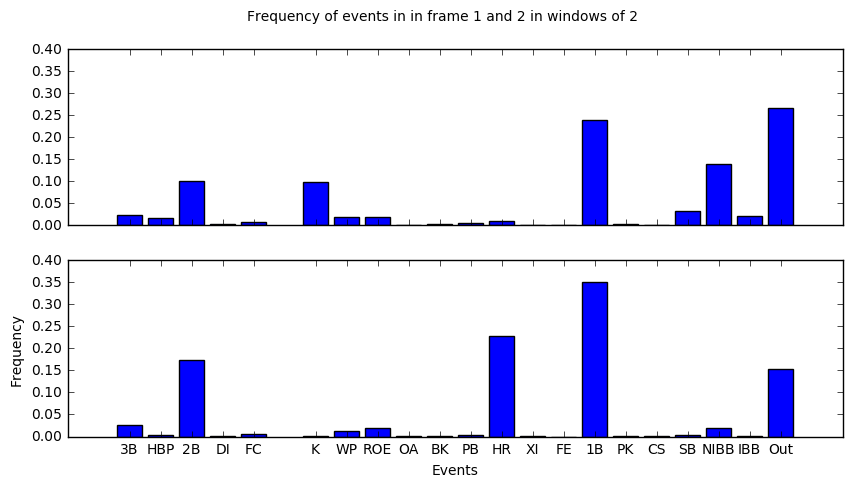

In [62]:
fig, ax = plt.subplots(2, 1, figsize=(10,5), sharey=True, sharex=True)
ax[0].bar(list(eventFreq2_1.keys()), list(eventNameFreq2_1.values()), align='center')
ax[1].bar(list(eventFreq2_2.keys()), list(eventNameFreq2_2.values()), align='center')

#plt.bar(list(eventFreq2.keys()), list(eventNameFreq2.values()))
plt.xticks(eventFreq2_1.keys(), eventNameFreq2_1.keys())
plt.xlabel("Events")
plt.ylabel("Frequency")
fig.suptitle("Frequency of events in in frame 1 and 2 in windows of 2")
plt.show()

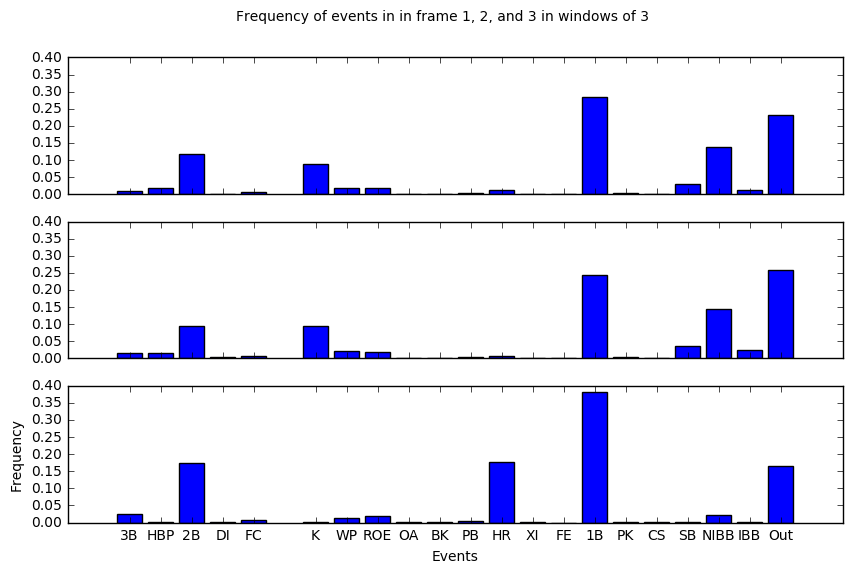

In [63]:
fig, ax = plt.subplots(3, 1, figsize=(10,6), sharey=True, sharex=True)
ax[0].bar(list(eventFreq3_1.keys()), list(eventNameFreq3_1.values()), align='center')
ax[1].bar(list(eventFreq3_2.keys()), list(eventNameFreq3_2.values()), align='center')
ax[2].bar(list(eventFreq3_3.keys()), list(eventNameFreq3_3.values()), align='center')

#plt.bar(list(eventFreq2.keys()), list(eventNameFreq2.values()))
plt.xticks(eventFreq3_1.keys(), eventNameFreq3_1.keys())
plt.xlabel("Events")
plt.ylabel("Frequency")
fig.suptitle("Frequency of events in in frame 1, 2, and 3 in windows of 3")
plt.show()

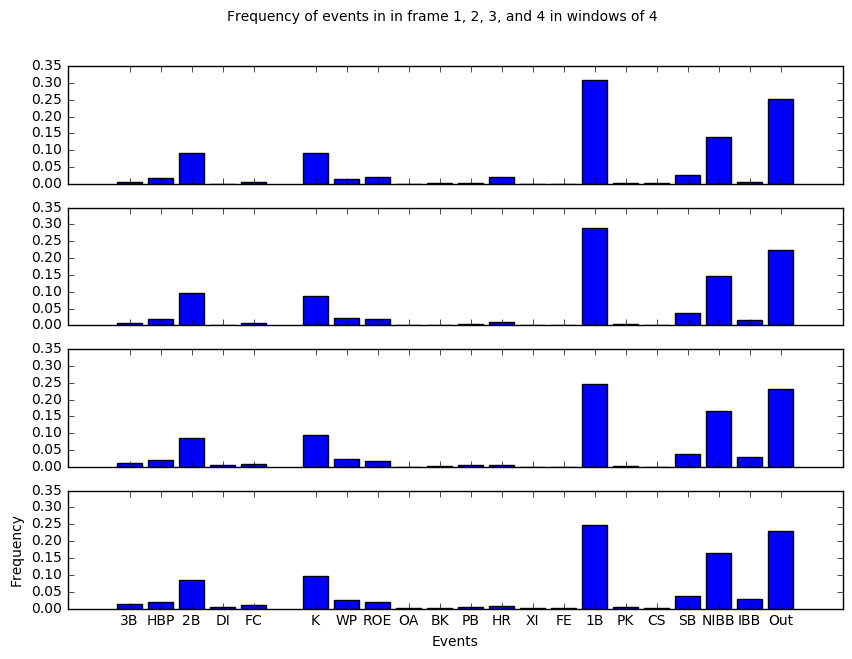

In [64]:
fig, ax = plt.subplots(4, 1, figsize=(10,7), sharey=True, sharex=True)
ax[0].bar(list(eventFreq4_1.keys()), list(eventNameFreq4_1.values()), align='center')
ax[1].bar(list(eventFreq4_2.keys()), list(eventNameFreq4_2.values()), align='center')
ax[2].bar(list(eventFreq4_3.keys()), list(eventNameFreq4_3.values()), align='center')
ax[3].bar(list(eventFreq4_3.keys()), list(eventNameFreq4_3.values()), align='center')

#plt.bar(list(eventFreq2.keys()), list(eventNameFreq2.values()))
plt.xticks(eventFreq4_1.keys(), eventNameFreq4_1.keys())
plt.xlabel("Events")
plt.ylabel("Frequency")
fig.suptitle("Frequency of events in in frame 1, 2, 3, and 4 in windows of 4")
plt.show()

In [67]:
#transition matrices 

trans2_1to2 = {}

trans3_1to2 = {}
trans3_2to3 = {}

trans4_1to2 = {}
trans4_2to3 = {}
trans4_3to4 = {}

#for counting of unique sequences
hashable2Seqs = {}
hashable3Seqs = {}
hashable4Seqs = {}

for i in range(2, 24):
    trans2_1to2[i] = {}

    trans3_1to2[i] = {}
    trans3_2to3[i] = {}

    trans4_1to2[i] = {}
    trans4_2to3[i] = {}
    trans4_3to4[i] = {}

#count transitions
for v in range(0, total2):
    e1 = events2DF['event_cd'][v]
    e2 = events2DF['eventCD2'][v]
    trans2_1to2[e1][e2] = trans2_1to2[e1].get(e2, 0) + 1
    hashable2Seqs[str(e1) + "_" + str(e2)] = hashable2Seqs.get(str(e1) + "_" + str(e2), 0) + 1
    
for v in range(0, total3):
    e1 = events3DF['event_cd'][v]
    e2 = events3DF['eventCD2'][v]
    e3 = events3DF['eventCD3'][v]
    trans3_1to2[e1][e2] = trans3_1to2[e1].get(e2, 0) + 1
    trans3_2to3[e2][e3] = trans3_2to3[e2].get(e3, 0) + 1
    hashable3Seqs[str(e1) + "_" + str(e2) + "_" + str(e3)] = hashable2Seqs.get(str(e1) + "_" + str(e2) + "_" + str(e3), 0) + 1
    
for v in range(0, total4):
    e1 = events4DF['event_cd'][v]
    e2 = events4DF['eventCD2'][v]
    e3 = events4DF['eventCD3'][v]
    e4 = events4DF['eventCD4'][v]
    trans4_1to2[e1][e2] = trans4_1to2[e1].get(e2, 0) + 1
    trans4_2to3[e2][e3] = trans4_2to3[e2].get(e3, 0) + 1
    trans4_3to4[e3][e4] = trans4_3to4[e3].get(e4, 0) + 1
    hashable4Seqs[str(e1) + "_" + str(e2) + "_" + str(e3) +"_" + str(e4)] = hashable2Seqs.get(str(e1) + "_" + str(e2) + "_" + str(e3) + "_" + str(e4), 0) + 1

    
#normalize 
for k in range(2, 24):
    total = 0
    for k2 in trans2_1to2[k].keys():
        total += trans2_1to2[k][k2]
    for k2 in trans2_1to2[k].keys():
        trans2_1to2[k][k2] = round(float(trans2_1to2[k][k2])/ float(total), 5)
        
    total = 0
    for k2 in trans3_1to2[k].keys():
        total += trans3_1to2[k][k2]
    for k2 in trans3_1to2[k].keys():
        trans3_1to2[k][k2] = round(float(trans3_1to2[k][k2])/ float(total), 5)
    total = 0
    for k2 in trans3_2to3[k].keys():
        total += trans3_2to3[k][k2]
    for k2 in trans3_2to3[k].keys():
        trans3_2to3[k][k2] = round(float(trans3_2to3[k][k2])/ float(total), 5)
        
    total = 0
    for k2 in trans4_1to2[k].keys():
        total += trans4_1to2[k][k2]
    for k2 in trans4_1to2[k].keys():
        trans4_1to2[k][k2] = round(float(trans4_1to2[k][k2])/ float(total), 5)
    total = 0
    for k2 in trans4_2to3[k].keys():
        total += trans4_2to3[k][k2]
    for k2 in trans4_2to3[k].keys():
        trans4_2to3[k][k2] = round(float(trans4_2to3[k][k2])/ float(total), 5)
    total = 0
    for k2 in trans4_3to4[k].keys():
        total += trans4_3to4[k][k2]
    for k2 in trans4_3to4[k].keys():
        trans4_3to4[k][k2] = round(float(trans4_3to4[k][k2])/ float(total), 5)


    